## 머신 러닝의 특징들에 대해 배운다.

### 1. 머신 러닝 모델의 평가

Validation Data는 모델의 성능을 조정하기 위한 용도이다.  
하이퍼파라미터(초매개변수)를 조정하는데 쓴다.  
반면, 가중치나 편향과 같은 학습을 통해 바뀌어가는 변수를 매개변수라고 한다.  

하이퍼파라미터는 보통 사용자가 직접 정해줄 수 있다.  
매개변수는 모델이 학습하는 과정에서 얻어지는 값이다.  

하이퍼파라미터 튜닝은 Validation Data를 사용해 진행한다.  
그리고, 튜닝이 끝나면 Test Data를 바탕으로 모델 성능을 최종 평가한다.

만약, 검증 데이터와 테스트 데이터를 나눌 만큼 데이터가 충분하지 않다면  
k-폴드 교차 검증이라는 방법을 사용한다.  

### 2. 분류(Classification)와 회귀(Regression)

### 1) 이진 분류 문제(Binary Classification)
주어진 입력에서 둘 중 하나의 답을 정하는 문제  
ex) 합격, 불합격 / 정상 메일, 스팸 메일

### 2) 다중 클래스 분류(Multi-class Classification)
ex)  MNIST 손글씨 분류

### 3) 회귀 문제(Regression)
연속된 값을 예측하는 문제  
ex) 시계열 데이터를 이용한 주가 예측, 생산량 예측, 지수 예측

### 3. 지도 학습과 비지도 학습

#### 1) 지도 학습
#### 2) 비지도 학습
#### 3) 강화 학습

### 4. 샘플(Sample)과 특성(Feature)

여러 개의 특성(Feature)를 갖고 있는 하나의 데이터를 샘플(Sample)이라고 한다.

### 5. 혼동 행렬(Confusion Matrix)

#### 1) 정밀도(Precision)
양성이라고 대답한 전체 케이스에 대한 TP의 비율

#### 2) 재현률(Recall)
실제 양성인 데이터 중에서 얼마나 양성인지를 재현했는지의 비율

### 6. 과적합(Overfitting)과 과소적합(Underfitting)

과적합 : 훈련 데이터 정확도는 높으나, 테스트 데이터의 정확도가 낮은 상황  
과소적합 : 테스트 데이터의 정확도가 더 올라갈 여지가 있음에도 훈련을 덜 진행한 상황

### 7. 비선형 활성화 함수

입력을 받아 수학적 변환을 수행하고 출력을 생성하는 함수.  
은닉층에서 시그모이드 함수를 사용하는 것을 지양해야 하고, ReLU 함수가 낫다.는 것을 설명한다.  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### 1) 활성화 함수의 특징 - 비선형 함수(Nonlinear function)

인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 한다.  
그런데 만약 활성화 함수를 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없다.  

선형 함수를 은닉층으로 여러번 추가하더라도, 그냥 가중치를 1회 추가한 것과 다를게 없게 된다.    
https://wikidocs.net/60021

#### 2) 시그모이드 함수와 기울기 소실

시그모이드 함수의 문제점은 미분을 해서 기울기(gradient)를 구할 때 발생한다.

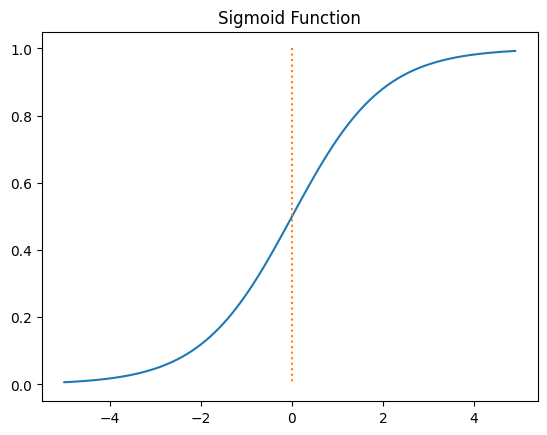

In [3]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

https://ffighting.net/deep-learning-basic/%eb%94%a5%eb%9f%ac%eb%8b%9d-%ed%95%b5%ec%8b%ac-%ea%b0%9c%eb%85%90/backpropagation/

gradient vanishing 문제.
0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 된다. 이를 극복하여 Relu를 사용해 성능을 끌어올린 것이 AlexNet.